# Определение перспективного тарифа для телеком компании

Представлены данные компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Шаг 1. Откройте файл с данными и изучите общую информацию.

Мы имеем 5 таблиц с данными о пользователях тарифных планов:
1. calls.csv
2. internet.csv
3. messages.csv
4. tariffs.csv
5. users.csv

Откроем каждый файл с данными, прочитаем информацию о них, посчитаем количество пустых значений и дубликатов.

#### Calls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Посчитаем количество звонков, длительность которых равна 0.

In [3]:
df_calls[df_calls['duration'] ==0].count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

Посмотрим описание данных.

In [4]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
df_calls.duplicated().sum()

0

Прочитали таблицу с информацией о звонках пользователей, выгрузили первые 5 строк таблицы, а также информацию.
Всего в таблице 4 столбца. Столбец, который содержит дату звонка, имеет тип object, необходимо будет заметить его на date. Также в таблице есть данные с длительностью звонка 0.00. Это могут быть пропущенные звонки. Количество таких звонков составляет 39 613, или 19,5% от общего количества звонков. Таких данных достаточно много, чтобы просто их удалить, поэтому оставим в таблице и не будем ничего с ними делать. Поскольку оператор мобильной связи округляет данные по минутам до целых чисел, также округлим их в таблице. Дубликатов в данной таблице нет.

#### Internet

In [6]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Посмотрим описание данных.

In [8]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [9]:
df_internet.duplicated().sum()

0

Прочитали таблицу с информацией об использовании интернета пользователями. В данной таблице 5 столбцов. Есть странный столбец, который без названия и повторяет значения индексов таблицы - его можно удалить, это не повляет на структуру данных. Также столбец, который содержит дату, имеет тип object, который необходимо заменить на date. Кроме того, по каждому пользователю необходимо округлить значение использованных мегабайт до целых чисел. Дубликатов в данной таблице нет.

#### Messages

In [10]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
df_messages.duplicated().sum()

0

Прочитали данные о количестве сообщений, который отправили пользователи. Всего в таблице 3 столбца. Столбец с датой сообщения имеет тип object, необходимо заменить его на date. Дубликатов в данной таблице нет.

#### Tariffs

In [13]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Прочитали файл с информацией о тарифных планов. Таблица в порядке, никаких данных не обнаружено.

#### Users

In [15]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Прочитали файл с информацией о пользователях. Столбцы, которые содержат дату, имеют тип object, который необходимо заменить на date. Кроме того, только 38 пользователей имеют дату в столбце churn_date, у остальных это значение отсутствует. Можно предположить, что данный клиент все еще является активным пользователем услуг оператора.

### Вывод

Прочитали все файлы с данными, посмотрели общую информацию и описание данных, проанализировали количество нулевых значений, а также дубликатов. В каждом файле тип столбцов, которые содержат дату, необходимо будет заменить с object на date. В таблице с данными о потреблении интернета надо будет удалить столбец, которые повторяет индексы таблицы. 

### Шаг 2. Подготовьте данные

Неоходимо:
1. в таблице df_calls: 
<ul><li>заменить тип данных столбца с датой на date
<li>добавить в таблицу столбец с месяцем
<li>округлить данные по длительности в большую сторону
<li>посчитать количество звонков и минут на каждого пользователя в месяц</ul>
<br>
2. в таблице df_internet:
<ul><li>удалить ненужный столбец
<li>заменить тип данных столбца с датой на date
<li>добавить в таблицу столбец с месяцем
<li>округлить количество использованных мегабайт в большую сторону
<li>посчитать количество использованных пользователем мегабайт в месяц</ul>
<br>
3. в таблице df_messages:
<ul><li>заменить тип данных столбца с датой на date
<li>добавить в таблицу столбец с месяцем
<li>посчитать количество сообщений на каждого пользователя в месяц</ul>
<br>
4. посчитать помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

#### 1. df_calls

In [17]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Заменим тип столбца с датой и проверим.

In [18]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Округлим значение о длительности звонка в большую сторону и проверим результат.

In [19]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Добавим в таблицу отдельно столбец с номером месяца.

In [20]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Посчитаем количество звонков и минут на каждого пользователя в месяц.

In [21]:
df_calls_pivot = df_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum']).reset_index()
df_calls_pivot.head()

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


Переименуем столбцы сводной таблицы.

In [22]:
df_calls_pivot.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
df_calls_pivot.head()

,user_id,month,calls_count,calls_duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


Мы подготовили таблицу с данными о количестве и длительности звонков пользователей в разрезе по месяцам.

#### 2. df_internet

In [23]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [24]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Сохраним в датафрейм все стобцы, кроме Unnamed: 0.

In [25]:
df_internet = df_internet[['id', 'mb_used', 'session_date','user_id']]
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Заменим тип данных столбца с датой на date и добавим в таблицу столбец с месяцем.

In [26]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Округлим количество использованных мегабайт в большую сторону.

In [27]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9


Посчитаем количество использованных пользователем мегабайт в месяц.

In [28]:
df_internet_pivot = df_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


Переименуем стобцы сводной таблицы.

In [29]:
df_internet_pivot.columns = ['user_id', 'month', 'mb_used']
df_internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


Мы подготовили таблицу с данными о потреблении интернета пользователями в разрезе по месяцам.

#### 3. df_messages

In [30]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [31]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Заменим тип данных столбца с датой на date и добавим в таблицу столбец с месяцем.

In [32]:
df_messages['session_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head()

,id,message_date,user_id,session_date,month
0,1000_0,2018-06-27,1000,2018-06-27,6
1,1000_1,2018-10-08,1000,2018-10-08,10
2,1000_2,2018-08-04,1000,2018-08-04,8
3,1000_3,2018-06-16,1000,2018-06-16,6
4,1000_4,2018-12-05,1000,2018-12-05,12


Посчитать количество сообщений на каждого пользователя в месяц.

In [33]:
df_messages_pivot = df_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count').reset_index()
df_messages_pivot.head()

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Переименуем столбцы сводной таблицы.

In [34]:
df_messages_pivot.columns = ['user_id', 'month', 'messages']
df_messages_pivot.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Мы подготовили таблицу с данными о количестве отправленных сообщений пользователями в разрезе по месяцам.

Для того, чтобы далее мы могли соединить несколько таблиц в одну, а именно по каждому пользователю в зависимости от его тарифного плана посчитать выручку, переименуем столбец c названием тарифа в табличке users, аналогично тому, как он называется в табличке tariffs.

In [35]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [36]:
df_users.columns=['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name']
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


#### 4. Выручка по пользователю в месяц

Соединим все таблицы в одну большую таблицу.

In [37]:
data_1 = df_calls_pivot.merge(df_internet_pivot, on=['user_id','month'], how='left')
data_1.head()

,user_id,month,calls_count,calls_duration,mb_used
0,1000,5,22,159.0,2256.0
1,1000,6,43,172.0,23257.0
2,1000,7,47,340.0,14016.0
3,1000,8,52,408.0,14070.0
4,1000,9,58,466.0,14581.0


In [38]:
data_2 = data_1.merge(df_messages_pivot, on=['user_id','month'], how='left')
data_2.head()

,user_id,month,calls_count,calls_duration,mb_used,messages
0,1000,5,22,159.0,2256.0,22.0
1,1000,6,43,172.0,23257.0,60.0
2,1000,7,47,340.0,14016.0,75.0
3,1000,8,52,408.0,14070.0,81.0
4,1000,9,58,466.0,14581.0,57.0


In [39]:
data_3 = data_2.merge(df_users, on='user_id', how='left')
data_3.head()

,user_id,month,calls_count,calls_duration,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,5,22,159.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,172.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,340.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,408.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,466.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [40]:
df = data_3.merge(df_tariffs, on='tariff_name', how='left')
df.head()

,user_id,month,calls_count,calls_duration,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [41]:
print(f'Количество клиентов: {df.user_id.nunique()}')

Количество клиентов: 492


После того, как получили одну большую таблицу df, посмотрим информацию о ней.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 20 columns):
user_id                  3174 non-null int64
month                    3174 non-null int64
calls_count              3174 non-null int64
calls_duration           3174 non-null float64
mb_used                  3163 non-null float64
messages                 2678 non-null float64
age                      3174 non-null int64
churn_date               187 non-null object
city                     3174 non-null object
first_name               3174 non-null object
last_name                3174 non-null object
reg_date                 3174 non-null object
tariff_name              3174 non-null object
messages_included        3174 non-null int64
mb_per_month_included    3174 non-null int64
minutes_included         3174 non-null int64
rub_monthly_fee          3174 non-null int64
rub_per_gb               3174 non-null int64
rub_per_message          3174 non-null int64
rub_per_minute           31

Из информации о таблице видим6 что в столбцах mb_used, messages и churn_date есть нулевые значения. Пропуски в столбцах mb_used и  messages могли оказаться по причине того, что пользователи могли не пользоваться данными услугами в определенный месяц. Поэтому мы можем заменить их на 0. Пропуски в столбце churn_date могут значить, что пользователи продолжают еще пользоваться тарифом.

In [43]:
df[df['mb_used'].isnull()].head()

,user_id,month,calls_count,calls_duration,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1697,1273,5,24,220.0,NaN,21.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
1698,1273,6,40,230.0,NaN,38.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
1699,1273,7,44,253.0,NaN,37.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
1700,1273,8,53,253.0,NaN,41.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
1701,1273,9,33,223.0,NaN,32.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1


Заменим пропуски на 0.

In [44]:
df['mb_used'] = df['mb_used'].fillna(0)
df['messages'] = df['messages'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 20 columns):
user_id                  3174 non-null int64
month                    3174 non-null int64
calls_count              3174 non-null int64
calls_duration           3174 non-null float64
mb_used                  3174 non-null float64
messages                 3174 non-null float64
age                      3174 non-null int64
churn_date               187 non-null object
city                     3174 non-null object
first_name               3174 non-null object
last_name                3174 non-null object
reg_date                 3174 non-null object
tariff_name              3174 non-null object
messages_included        3174 non-null int64
mb_per_month_included    3174 non-null int64
minutes_included         3174 non-null int64
rub_monthly_fee          3174 non-null int64
rub_per_gb               3174 non-null int64
rub_per_message          3174 non-null int64
rub_per_minute           31

Посчитаем перерасход минут, сообщений и интернета по пользователю каждый месяц.

In [45]:
df['minutes_overrun']  = df['calls_duration'] - df['minutes_included']
df['messages_overrun'] = df['messages'] - df['messages_included']
df['mb_used_overrun']  = df['mb_used'] - df['mb_per_month_included'] 
df.head()

,user_id,month,calls_count,calls_duration,mb_used,messages,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun
0,1000,5,22,159.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-28464.0
1,1000,6,43,172.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-7463.0
2,1000,7,47,340.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-16704.0
3,1000,8,52,408.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-16650.0
4,1000,9,58,466.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-16139.0


Посчитаем общую выручку с каждого пользователя в месяц.

In [46]:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute']
    if row['messages_overrun'] > 0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['mb_used_overrun'] > 0:
        revenue_mb = (row['mb_used_overrun'] / 1024) * row['rub_per_gb']
    return revenue_by_min + revenue_by_messages + revenue_mb

df['revenue_over'] = df.apply(get_revenue, axis=1)
df['total_revenue'] = df['revenue_over'] + df['rub_monthly_fee']
df.head()

,user_id,month,calls_count,calls_duration,mb_used,messages,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun,revenue_over,total_revenue
0,1000,5,22,159.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2841.0,-978.0,-28464.0,0.0,1950.0
1,1000,6,43,172.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2828.0,-940.0,-7463.0,0.0,1950.0
2,1000,7,47,340.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2660.0,-925.0,-16704.0,0.0,1950.0
3,1000,8,52,408.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2592.0,-919.0,-16650.0,0.0,1950.0
4,1000,9,58,466.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2534.0,-943.0,-16139.0,0.0,1950.0


### Вывод

Мы подготовили все таблицы: заменили типы столбцов, удалили ненужные данные, посчитали использование минут, сообщений, интернета по каждому пользователю в месяц. Собрали все в одну большую таблицу. Заменили в ней пропуски на 0 там, где это логически возможно и правильно. Добавили в общую таблицу перерасход пользователя по тарифному плану и посчитали помесячную выручку с каждого тарифного плана.

### Шаг 3. Проанализируйте данные

Необходимо описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

In [47]:
df_tariff_mean = df.pivot_table(index='tariff_name', values=['calls_duration','mb_used','messages'], 
                          aggfunc={'calls_duration':[np.mean, np.std, np.var],
                                   'mb_used':[np.mean, np.std, np.var],
                                   'messages':[np.mean, np.std, np.var]}).reset_index()
df_tariff_mean

tariff_name calls_duration                                 mb_used  \
                        mean         std           var          mean   
0       smart     419.062978  189.325618  35844.189551  16230.166892   
1       ultra     545.451104  306.925754  94203.418396  19480.544690   

                                messages                          
            std           var       mean        std          var  
0   5883.363044  3.461396e+07  33.396311  28.259437   798.595792  
1  10135.971146  1.027379e+08  49.033649  46.890656  2198.733603

Пользователям тарифа Смарт в среднем необходимо 419 минут звонков, в то время как пользователям тарифа Ультра - 545. При этом для пользователей тарифа Смарт длительность звонка может варьироваться до 189 минут, а Ультра - около 307 минут.
В среднем пользователям тарифа Смарт необходимо 16Гб трафика в месяц и это значение может варьироваться до 6Гб, Ультра - 19Гб и отклонение от этого значения достаточно существенно - около 10Гб. 
Пользователи тарифа Смарт в месяц в среднем отправляют 34 смс, Ультра - 49. Но у двух тарифов есть и те пользователи, которые практически не пользуются данной услугой.

In [48]:
df_smart = df[df['tariff_name'] =='smart']
df_smart.head()

,user_id,month,calls_count,calls_duration,mb_used,messages,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun,revenue_over,total_revenue
8,1001,11,59,430.0,18452.0,0.0,41,NaN,Москва,Иван,...,500,550,200,3,3,-70.0,-50.0,3092.0,603.906250,1153.906250
9,1001,12,63,414.0,14053.0,0.0,41,NaN,Москва,Иван,...,500,550,200,3,3,-86.0,-50.0,-1307.0,0.000000,550.000000
10,1002,6,15,117.0,10871.0,4.0,59,NaN,Стерлитамак,Евгений,...,500,550,200,3,3,-383.0,-46.0,-4489.0,0.000000,550.000000
11,1002,7,26,214.0,17601.0,11.0,59,NaN,Стерлитамак,Евгений,...,500,550,200,3,3,-286.0,-39.0,2241.0,437.695312,987.695312
12,1002,8,42,289.0,20347.0,13.0,59,NaN,Стерлитамак,Евгений,...,500,550,200,3,3,-211.0,-37.0,4987.0,974.023438,1524.023438


In [49]:
df_ultra = df[df['tariff_name'] =='ultra']
df_ultra.head()

,user_id,month,calls_count,calls_duration,mb_used,messages,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun,revenue_over,total_revenue
0,1000,5,22,159.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2841.0,-978.0,-28464.0,0.0,1950.0
1,1000,6,43,172.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2828.0,-940.0,-7463.0,0.0,1950.0
2,1000,7,47,340.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2660.0,-925.0,-16704.0,0.0,1950.0
3,1000,8,52,408.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2592.0,-919.0,-16650.0,0.0,1950.0
4,1000,9,58,466.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,-2534.0,-943.0,-16139.0,0.0,1950.0


Построим гистограмму распределения минут по двум тарифам.

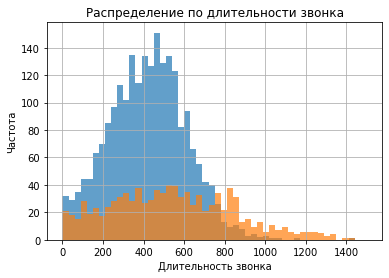

In [50]:
hist_calls = df_smart['calls_duration'].plot(kind='hist', bins=50, range=(0, 1500), grid=True, alpha=0.7, 
                                title='Распределение по длительности звонка')
df_ultra['calls_duration'].plot(kind='hist', bins=50, range=(0, 1500), grid=True, alpha=0.7)
hist_calls.set_xlabel('Длительность звонка')
hist_calls.set_ylabel('Частота')
plt.show()

Голубым цветом отображается распределение для тарифа Смарт, оранжевым - Ультра.
Как видим, оба распределения имеют вид нормального распределения. Однако есть скошенность вправо, это значит, что медиана в данном случае будет меньше среднего значения.

Построим диаграмму размаха по двум тарифным планам.

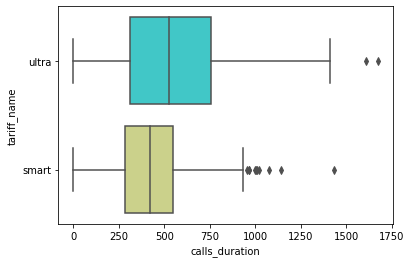

In [51]:
sns.boxplot(data=df, x='calls_duration', y='tariff_name', palette='rainbow', orient='h')
plt.show()

Как видим из диаграммы размаха, большинство пользователей тарифа Смарт чаще всего в месяц тратят приблизительно от 255 до 510 минут, а тарифа Ультра - от 260 до 750 минут. Для более 75% процентов пользователей тарифа Смарт количество минут в месяц не превыщает 900, а для тарифа Ультра - 1450.

Построим гистограмму распределения использования интернета по двум тарифам.

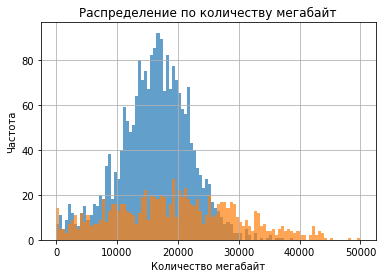

In [52]:
hist_internet = df_smart['mb_used'].plot(kind='hist', bins=100, range=(0, 50000), grid=True, alpha=0.7, 
                                title='Распределение по количеству мегабайт')
df_ultra['mb_used'].plot(kind='hist', bins=100, range=(0, 50000), grid=True, alpha=0.7)
hist_internet.set_xlabel('Количество мегабайт')
hist_internet.set_ylabel('Частота')
plt.show()

Голубым цветом отображается распределение для тарифа Смарт, оранжевым - Ультра.
Как видим, оба распределения имеют вид нормального распределения. Есть небольшая скошенность вправо, таким образом медиана будет немного меньше среднего значения.

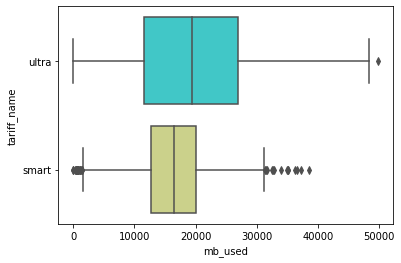

In [53]:
sns.boxplot(data=df, x='mb_used', y='tariff_name', palette='rainbow', orient='h')
plt.show()

Как видим из диаграммы размаха, большинство пользователей тарифа Смарт чаще всего в месяц используют приблизительно от 12Гб до 20Гб, а тарифа Ультра - от 11Гб до 27Гб. Для более 75% процентов пользователей тарифа Смарт количество использованных гигабайт не превыщает 31Гб, а для тарифа Ультра - 48Гб.

Построим гистограмму распределения количества отправленных сообщений по двум тарифам.

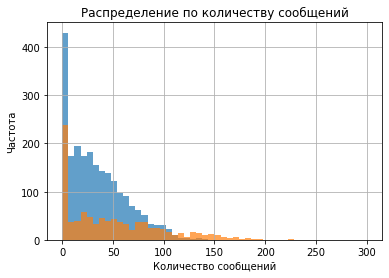

In [54]:
hist_messages = df_smart['messages'].plot(kind='hist', bins=50, range=(0, 300), grid=True, alpha=0.7, 
                                title='Распределение по количеству сообщений')
df_ultra['messages'].plot(kind='hist', bins=50, range=(0, 300), grid=True, alpha=0.7)
hist_messages.set_xlabel('Количество сообщений')
hist_messages.set_ylabel('Частота')
plt.show()

Как видим, данное распределение не относится к нормальному распределению. Большинство пользователей двух тарифных планов не пользуются данной услугой.

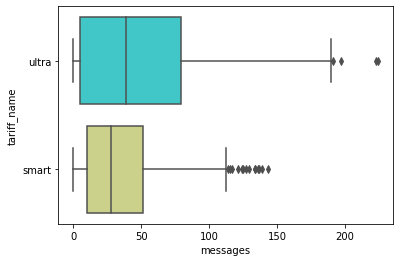

In [55]:
sns.boxplot(data=df, x='messages', y='tariff_name', palette='rainbow', orient='h')
plt.show()

Диаграмма размаха демонстрирует, что большинство пользователей тарифа Смарт чаще всего в месяц отправляет 10 до 50 сообщений, а тарифа Ультра - от 7 до 75. Для более 75% процентов пользователей тарифа Смарт количество отправленных сообщений не превышает 110, а для тарифа Ультра - 190.

### Вывод

#### Смарт
Пользователям тарифа Смарт в среднем необходимо 419 минут звонков, при этом длительность звонка может варьироваться до 189 минут. Большинство чаще всего в месяц тратят приблизительно от 255 до 510 минут. Для более 75% процентов пользователей количество минут в месяц не превышает 900.
В среднем пользователям тарифа Смарт необходимо 16Гб трафика в месяц и это значение может варьироваться до 6Гб. Чаще всего в месяц используют приблизительно от 12Гб до 20Гб. Для более 75% процентов пользователей тарифа Смарт количество использованных гигабайт не превышает 31Гб
Пользователи тарифа Смарт в месяц в среднем отправляют 34 смс. Большинство пользователей тарифа Смарт чаще всего в месяц отправляет 10 до 50 сообщений. Для более 75% процентов пользователей тарифа Смарт количество отправленных сообщений не превышает 110.
<br>
#### Ультра
Пользователям тарифа Ультра в среднем необходимо 545 минут. Данное значение может варьироваться до 307 минут в каждую сторону. Большинство пользователей тратят в месяц от 260 до 750 минут. Для более 75% процентов количество минут в месяц не превышает 1450.
В среднем пользователям тарифа Ультра необходимо 19Гб трафика в месяц и это значение может варьироваться до 10Гб. Чаще всего в месяц используют приблизительно от 11Гб до 27Гб. Для более 75% процентов пользователей тарифа Ультра количество использованных гигабайт не превышает 48Гб
Пользователи тарифа Ультра в месяц в среднем отправляют в 49 смс. Большинство пользователей тарифа Смарт чаще всего в месяц отправляет 7 до 75 сообщений. Для более 75% процентов пользователей тарифа Смарт количество отправленных сообщений не превышает 190.

### Шаг 4. Проверьте гипотезы

Необходимо проверить гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

#### 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Данная гипотеза относится к двухсторонним гипотезам, а именно необходимо сравнить средние двух совокупностей между собой. Нулевая гипотеза всегда формируется так, чтобы использовать знак равенства. Например, «среднее рассматриваемой генеральной совокупности равно A», где А - некоторое число. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ она звучит как «среднее генеральной совокупности не равно A».
<br>
Таким образом нулевой гипотезой будет H₀ - средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифы "Смарт". 
<br>Альтернативная гипотеза H₁ - средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифы "Смарт".

Посчитаем среднюю выручку для двух тарифных планов.

In [56]:
sample_ultra = df_ultra['total_revenue']
print('Средняя выручка тарифа Ультра -', sample_ultra.mean())

Средняя выручка тарифа Ультра - 2061.4712206723184


In [57]:
print('Дисперсия тарифа Ультра -', np.var(sample_ultra))

Дисперсия тарифа Ультра - 129077.35793352268


In [58]:
sample_smart = df_smart['total_revenue']
print('Средняя выручка тарифа Смарт -', sample_smart.mean())

Средняя выручка тарифа Смарт - 1234.2944430386865


In [59]:
print('Дисперсия тарифа Ультра -', np.var(sample_smart))

Дисперсия тарифа Ультра - 621302.1159889427


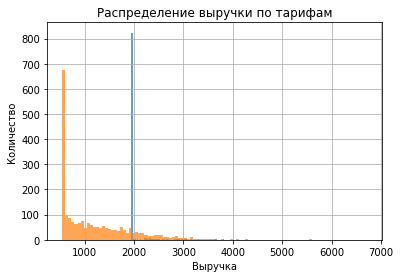

In [60]:
sample_ultra.plot(kind='hist', bins=100, title='Распределение выручки по тарифам', alpha=0.7).set_xlabel('Выручка')
sample_smart.plot(kind='hist', bins=100, alpha=0.7, grid=True).set_ylabel('Количество')
plt.show()

Поскольку дисперсии двух генеральных совокупностей отличаются более чем в 4,5 раза и распределение выглядит разным, то применим атрибут `equal_var = False`.

In [61]:
from scipy import stats as st
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_ultra, 
    sample_smart,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.525672521930252e-290
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различается. Средняя выручка пользователей тарифа "Ультра" значимо больше выручки пользователей тарифа "Смарт".

#### 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Данная гипотеза относится к двухсторонним гипотезам, а именно необходимо сравнить средние двух совокупностей между собой.
Таким образом нулевой гипотезой будет H₀ - средняя выручка пользователей из Москвы равна средней выручке пользователей в других регионах. <br> Альтернативная гипотеза H₁ - средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.

Посчитаем среднюю выручку для москвы и других регионов.

In [62]:
df_moscow = df[df['city'] =='Москва']
sample_moscow = df_moscow['total_revenue']
print('Средняя выручка пользователей из Москвы -', sample_moscow.mean())

Средняя выручка пользователей из Москвы - 1506.5509861680328


In [63]:
print('Дисперсия выручки для пользователей из Москвы -', np.var(sample_moscow))

Дисперсия выручки для пользователей из Москвы - 546920.9053299531


In [64]:
df_regions = df[df['city'] !='Москва']
sample_regions = df_regions['total_revenue']
print('Средняя выручка пользователей из других регионов -', sample_regions.mean())

Средняя выручка пользователей из других регионов - 1476.325887742541


In [65]:
print('Дисперсия выручки для пользователей из других регионов -', np.var(sample_regions))

Дисперсия выручки для пользователей из других регионов - 633996.668765639


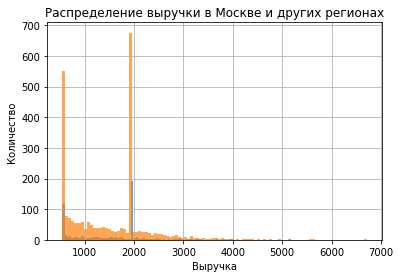

In [66]:
sample_moscow.plot(kind='hist', bins=100, title='Распределение выручки в Москве и других регионах', alpha=0.7).set_xlabel('Выручка')
sample_regions.plot(kind='hist', bins=100, alpha=0.7, grid=True).set_ylabel('Количество')
plt.show()

Поскольку дисперсии двух генеральных совокупностей не сильно отличаются между собой, а распределений выглядит правтически одинаково, то не будем применять атрибут `equal_val` в Т-тесте, потому что по умолчанию он считается True.

In [67]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_moscow, 
    sample_regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.39332337932777506
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и других регионов различается, с вероятностью в почти 39% такое или большее различие можно получить случайно.

### Вывод

Средняя выручка тарифа Ультра значимо больше средней выручки тарифа Смарт.
<br>
Нет значимой разницы между средней выручкой пользователей из Москвы и других регионов.

### Шаг 5. Напишите общий вывод

1. Пользователям тарифа Смарт в среднем необходимо 419 минут звонков, при этом длительность звонка может варьироваться до 189 минут. Большинство чаще всего в месяц тратят приблизительно от 255 до 510 минут. Для более 75% процентов пользователей количество минут в месяц не превышает 900.
В среднем пользователям тарифа Смарт необходимо 16Гб трафика в месяц и это значение может варьироваться до 6Гб. Чаще всего в месяц используют приблизительно от 12Гб до 20Гб. Для более 75% процентов пользователей тарифа Смарт количество использованных гигабайт не превышает 31Гб
Пользователи тарифа Смарт в месяц в среднем отправляют 34 смс. Большинство пользователей тарифа Смарт чаще всего в месяц отправляет 10 до 50 сообщений. Для более 75% процентов пользователей тарифа Смарт количество отправленных сообщений не превышает 110.
<br>
2. Пользователям тарифа Ультра в среднем необходимо 545 минут. Данное значение может варьироваться до 307 минут в каждую сторону. Большинство пользователей тратят в месяц от 260 до 750 минут. Для более 75% процентов количество минут в месяц не превышает 1450.
В среднем пользователям тарифа Ультра необходимо 19Гб трафика в месяц и это значение может варьироваться до 10Гб. Чаще всего в месяц используют приблизительно от 11Гб до 27Гб. Для более 75% процентов пользователей тарифа Ультра количество использованных гигабайт не превышает 48Гб
Пользователи тарифа Ультра в месяц в среднем отправляют в 49 смс. Большинство пользователей тарифа Смарт чаще всего в месяц отправляет 7 до 75 сообщений. Для более 75% процентов пользователей тарифа Смарт количество отправленных сообщений не превышает 190.
<br>
Средняя выручка тарифа Ультра значимо больше средней выручки тарифа Смарт.
<br>
Нет значимой разницы между средней выручкой пользователей из Москвы и других регионов.
<br>
3. Таким образом, пользователи тарифа Ультра тратят большее количество минут в месяц, мегабайт интернета и приносят большую выручку для компании в месяц.

### Чек-лист готовности проекта

- [x]  открыты файлы
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  данные приведены к нужным типам
- [x]  есть пояснение, какие ошибки нашли и как их исправили
- [x]  посчитано и добавлено в таблицу: количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  посчитано и добавлено в таблицу: количество отправленных сообщений по месяцам
- [x]  посчитано и добавлено в таблицу: объем израсходованного интернет-трафика по месяцам
- [x]  посчитано и добавлено в таблицу: перерасход по звонкам
- [x]  посчитано и добавлено в таблицу: перерасход по сообщениям
- [x]  посчитано и добавлено в таблицу: перерасход по интернет-трафику
- [x]  посчитано и добавлено в таблицу: помесячная выручка с каждого пользователя
- [x]  описано поведение клиентов оператора, исходя из выборки
- [x]  Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
- [x]  Посчитано среднее количество, дисперсия и стандартное отклонение
- [x]  Построены гистограммы
- [x]  Описаны распределения
- [x]  Проверена гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
- [x]  Проверена гипотеза "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- [x]  Есть пояснение, как формулировали нулевую и альтернативную гипотезы
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод